Simple Regression

In [3]:
import pandas as pd 
import numpy as np 
import os 
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
df = pd.read_csv("advertising.csv", usecols = [1,2,3,4])

In [8]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
df = df.iloc[:,1:len(df)]

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [11]:
df.corr()

,radio,newspaper,sales
radio,1.000000,0.354104,0.576223
newspaper,0.354104,1.000000,0.228299
sales,0.576223,0.228299,1.000000


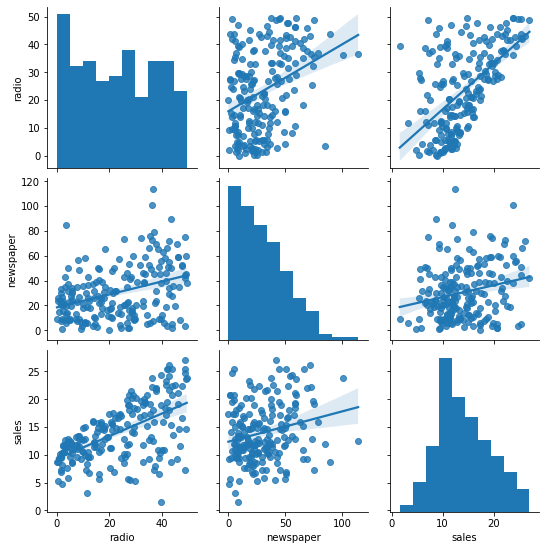

In [12]:
import seaborn as sns
sns.pairplot(df, kind = "reg")



# Modelling with Stats


In [36]:

X = df[["TV"]]

In [15]:
import statsmodels.api as sm 

In [37]:
X = sm.add_constant(X)

In [38]:
y = df["sales"]

In [39]:
lm = sm.OLS(y,X)

In [40]:
model = lm.fit()

In [41]:
model.summary() #coef and TV kısmında tv nin 1 biriminin satış üzerindeki etkisi 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 27 Jun 2020   Prob (F-statistic):           1.47e-42
Time:                        14:35:20   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Another method

In [5]:
import statsmodels.formula.api as smf
lm = smf.ols("sales ~ TV", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 04 Jul 2020   Prob (F-statistic):           1.47e-42
Time:                        12:45:26   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [44]:
model.f_pvalue

1.4673897001947095e-42

In [45]:
print("f_pvalue:", "%.4f"% model.fvalue)

f_pvalue: 312.1450


In [46]:
print("t_pvalue:", "%.4f"% model.tvalues[0:1])

t_pvalue: 15.3603


In [47]:
model.mse_model

3314.6181668686486

In [48]:
model.rsquared_adj

0.6099148238341623

In [49]:
model.fittedvalues[0:5
]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [29]:
import seaborn as sns
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [50]:
print("sales = "+ str("%.2f"% model.params[0])+"+TV"+"*"+ str("%.2f"%model.params[1]))

sales = 7.03+TV*0.05


(0, 28.278347130242828)

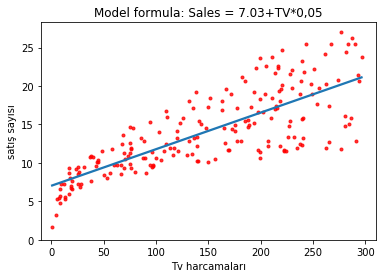

In [16]:
 g = sns.regplot(df["TV"], df["sales"], ci =None, scatter_kws={"color":"r","s":9})
 g.set_title("Model formula: Sales = 7.03+TV*0,05")
 g.set_ylabel("satış sayısı")
 g.set_xlabel("Tv harcamaları")
 plt.xlim(-10,310)
 plt.ylim(bottom = 0)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt 

In [8]:
from sklearn.linear_model import LinearRegression

In [10]:
X=df[["TV"]]

In [11]:
y=df["sales"]
reg = LinearRegression()
model = reg.fit(X,y)
model.intercept_
model.coef_ 

array([0.04753664])

In [61]:
model.score(X,y)

0.611875050850071

Prediction

In [12]:
X=df[["TV"]]
y=df["sales"]
reg = LinearRegression()
model = reg.fit(X,y)


In [75]:
model.predict([[30]])

array([8.45869276])

In [13]:
k_t = pd.DataFrame({"real_y": y[0:10],
                    "predicted_y": reg.predict(X)[0:10]})

In [66]:
k_t["hata"] = k_t["gercek_y"]-k_t["tahmin_y"]

In [14]:
k_t

,real_y,predicted_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [68]:
k_t["hata_kare"] = k_t["hata"]**2

In [69]:
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [70]:
np.sum(k_t["hata_kare"])

92.90350329638103

In [82]:
X = df.drop("sales", axis = 1)
y = df["sales"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30,
                                                          train_size = 0.70, random_state =0)

In [83]:
training = df.copy()

In [84]:
lm = sm.OLS(y_train,X_train)

In [86]:
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              2862.
Date:                Sat, 27 Jun 2020   Prob (F-statistic):                   2.50e-123
Time:                        16:40:24   Log-Likelihood:                         -289.37
No. Observations:                 140   AIC:                                      584.7
Df Residuals:                     137   BIC:                                      593.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0520      0.002     33.691      0.000       0.049       0.055
radio          0.2321      0.010     22.911      0.000       0.212       0.252
newspaper      0.0188      0.008      2.371      0.019       0.003       0.034
==============================================================================
Omnibus:                        1.996   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.369   Jarque-Bera (JB):                1.965
Skew:                           0.284   Prob(JB):                        0.374
Kurtosis:                       2.878   Cond. No.                         12.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
### Scikit-learn model

In [87]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [88]:
model.intercept_

2.880255286331323

In [89]:
model.coef_

array([0.04391531, 0.20027962, 0.00184368])

In [93]:
rmse = np.sqrt(mean_squared_error(y_train,model.predict(X_train)))## hata oranı

In [94]:
rmse

1.5768437866753109

In [97]:
cross_val_score(model,X,y, cv = 10, scoring = "r2").mean()

0.8853562237979616

In [101]:
np.sqrt(-cross_val_score(model,X_train,y_train, cv = 10, scoring = "neg_mean_squared_error")).mean() ##validating and real result

1.59979865949965


PLC 

In [136]:
hit = pd.read_csv("hitters.csv")


In [137]:
df1 = hit.copy()



In [138]:
df1 = df1.dropna()
df1.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [139]:
dms = pd.get_dummies(df1[["League", "Division","NewLeague"]])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [140]:
y = df1["Salary"]


In [141]:
X_ = df1.drop(["Salary","League","Division","NewLeague"],axis =1).astype("float64") #we removed dependent and categoric variables from dataset

In [142]:
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]], axis = 1)

In [143]:
X

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497.0,127.0,7.0,65.0,48.0,37.0,5.0,2703.0,806.0,32.0,379.0,311.0,138.0,325.0,9.0,3.0,1,0,1
318,492.0,136.0,5.0,76.0,50.0,94.0,12.0,5511.0,1511.0,39.0,897.0,451.0,875.0,313.0,381.0,20.0,0,0,0
319,475.0,126.0,3.0,61.0,43.0,52.0,6.0,1700.0,433.0,7.0,217.0,93.0,146.0,37.0,113.0,7.0,0,1,0
320,573.0,144.0,9.0,85.0,60.0,78.0,8.0,3198.0,857.0,97.0,470.0,420.0,332.0,1314.0,131.0,12.0,0,0,0


In [144]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size =0.25,
                                                    random_state = 42)

In [145]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

training = df.copy()

print("training", training.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_test (66,)
training (200, 4)


In [146]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import scale
pca= PCA()

In [147]:
X_reducen_train = pca.fit_transform(scale(X_train))

In [148]:
 np.cumsum(np.round(pca.explained_variance_ratio_,decimals = 4)*100)[0:100]

array([38.18, 59.88, 70.88, 78.88, 84.18, 88.45, 92.05, 94.86, 96.34,
       97.28, 98.01, 98.68, 99.18, 99.49, 99.74, 99.9 , 99.96, 99.98,
       99.99])

In [149]:
lm = LinearRegression()

In [150]:
pcr_model = lm.fit(X_reducen_train,y_train)

In [151]:
pcr_model.intercept_

543.4834416243655

In [154]:
y_pred = pcr_model.predict(X_reducen_train)

In [156]:
y_pred[0:5]

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

In [158]:
np.sqrt(mean_squared_error(y_train, y_pred))

289.3292825564976

In [17]:
! jupyter nbconvert --to html MachineLearning1.ipynb

[NbConvertApp] Converting notebook MachineLearning1.ipynb to html
[NbConvertApp] Writing 685875 bytes to MachineLearning1.html
